# Neural network regression with TensorFlow Exercises

In [119]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# import sklearn
from sklearn.model_selection import train_test_split

2.12.0


## Creating our regression dataset

In [120]:
# Creating data
X = np.linspace(0, 150, 101)

# Creating labels
y = X**(0.5)

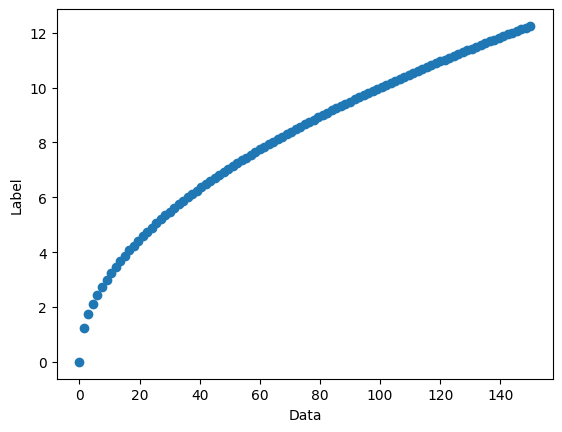

In [121]:
# Plot data
plt.scatter(X, y)
plt.xlabel('Data')
plt.ylabel('Label')
plt.show()

Let's add some noisy on our data and plot them again

In [122]:
# Creating noisy
noisy = np.random.randn(101)
noisy

array([-1.22649249, -1.18730111, -0.00342534,  0.76365109,  0.7108063 ,
        0.56528852,  0.5685522 , -1.35751552,  0.20171966,  0.92229687,
        1.30690939, -0.25877268, -1.73040833, -1.47850247,  0.57422873,
       -0.4320071 , -0.80436711,  2.36698428, -0.63378721,  1.20864247,
       -1.5397413 ,  1.11105559, -1.73468111,  0.22911817,  0.28597391,
        1.02243382,  1.2282581 , -0.26843766, -0.92293534, -1.23668116,
        1.51129782,  0.63089564,  0.462291  , -0.08886077, -0.35662026,
       -1.65091635, -1.61423314, -1.39875959, -1.47142003,  0.38917102,
        0.56241935,  1.73540628, -0.52865459, -0.37795908,  2.67397494,
        1.30231517,  0.30086053, -0.2957709 , -0.43338996,  0.15801095,
        0.1443707 ,  0.10434101, -1.28355221, -1.35956284,  1.00524188,
       -0.63599125,  0.99560906,  0.4254352 , -2.10031856, -2.08616209,
        1.73902655,  1.1128567 ,  0.25035276,  1.24045193,  1.11711947,
       -1.18039314, -0.18183609,  0.38239489,  1.67118634, -0.87

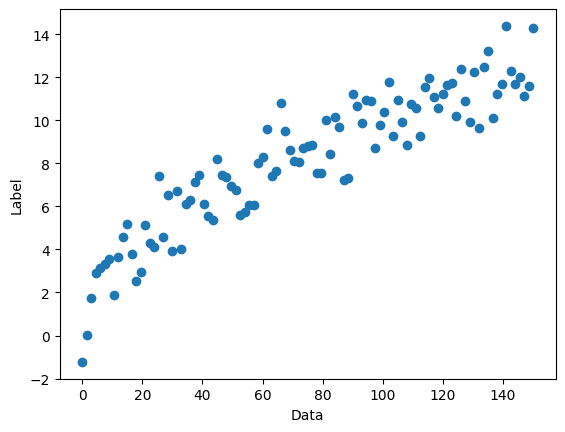

In [123]:
# Adding noisy on the data and plot again
y = y + noisy

# plot data again
plt.scatter(X, y)
plt.xlabel('Data')
plt.ylabel('Label')
plt.show()

In [124]:
# Let's turns numpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)

Our data is ready for modeling now. Let's create a neural network with 4 dense layer.

## Building neural network model with 4 dense layer

Before the modelling, we need to split our data to train and test sets.

In [125]:
# Split data to train and test 
X_train = X[0:70]
X_test = X[70:]
y_train = y[0:70]
y_test = y[70:]

In [126]:
# Building neural network model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 133.1892 - mae: 133.1892
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 46.1270 - mae: 46.1270
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 8.8861 - mae: 8.8861
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 4.6559 - mae: 4.6559
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 5.3027 - mae: 5.3027
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 8.2211 - mae: 8.2211
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 3.6004 - mae: 3.6004
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 4.0396 - mae: 4.0396
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 3.5689 - mae: 3.5689
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 3.6032 - mae: 3.6032
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 2

## Making predictions and evaluation our model

We fit our model and let's check the model predictions. How much good or bad our precitions?

In [127]:
# Model predictions
y_pred = model.predict(X_test)
print('Model predictions: ', '\n\n', tf.squeeze(y_pred))

# Actual values
print('Actual values: ', '\n\n', y_test)

1/1 [==============================] - 0s 72ms/step
Model predictions:  

 tf.Tensor(
[12.108631  12.26263   12.416631  12.570632  12.724632  12.878633
 13.032635  13.186632  13.340633  13.494635  13.648637  13.802633
 13.9566345 14.110636  14.264635  14.418633  14.572636  14.726635
 14.880636  15.034636  15.188635  15.342636  15.496637  15.650637
 15.804635  15.958636  16.112637  16.266636  16.420637  16.574638
 16.728638 ], shape=(31,), dtype=float32)
Actual values:  

 tf.Tensor(
[10.93549831  9.93077183  8.85266399 10.77824785 10.57376015  9.29632062
 11.54610004 11.96975938 11.09373207 10.59625649 11.22036129 11.63112503
 11.7290728  10.20152074 12.37945217 10.87929635  9.92885621 12.25653624
  9.66222112 12.49109274 13.23961495 10.12290334 11.20957195 11.68259409
 14.38927559 12.28278081 11.69763076 12.03790157 11.12567921 11.59113706
 14.2702753 ], shape=(31,), dtype=float64)


Let's plot our predictions and data. It might help us more clear explanation.

In [128]:
# Creating a plotting function
def plot_prediction(train_data=X_train, train_labels=y_train, 
     test_data=X_test, test_labels=y_test, predictions=y_pred):
  
  '''Ploting train data, test data and compare predictions with actual values'''

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Test data')
  # Plot model in red
  plt.scatter(test_data, predictions, c='r', label='Prediction')
  # Show legend and plot
  plt.legend()
  plt.show()

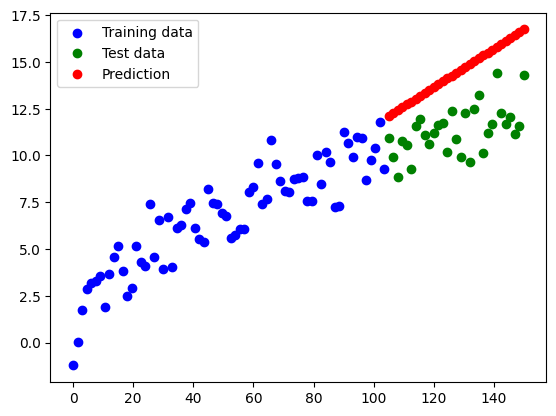

In [129]:
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=y_pred
                )

As you see, our model doesn't perform well. We should improve our model performance and it's predictions. 

## Improve the model

* Model_1: We will try larger model, which is one more layers and more neuron.
* Model_2: Changing the optimization function. At the first model we used SGD but we will try Adam.
* Model_3: Increasing and decreasing learning rate.
* Model_4: Increasing number of epochs. It means more longer train.

Using these 4 model, we will try to find out best model. Let's get started.

### Model_1: Adding one more layer to first model and increasing the number of neuron.

In [130]:
# Building neural network model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 10ms/step - loss: 134.8534 - mae: 134.8534
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 783589507072.0000 - mae: 783589507072.0000
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: nan - mae: nan
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: nan - mae: nan
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: nan - mae: nan
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: nan - mae: nan
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: nan - mae: nan
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: nan - mae: nan
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 12/100

We get nan in the progress bar after adding one more layers. Generally, it means overfitting occurs so let's stay with 4 dense layer and only increase the neurons.  

In [131]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 138.7157 - mae: 138.7157
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 53.8430 - mae: 53.8430
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 10.6263 - mae: 10.6263
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 3.0971 - mae: 3.0971
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 5.7129 - mae: 5.7129
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 3.1114 - mae: 3.1114
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 1.8337 - mae: 1.8337
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 2.5341 - mae: 2.5341
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 2.5462 - mae: 2.5462
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 2.4073 - mae: 2.4073
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss:

In [151]:
# Calculate evaluation metrics for model_1
print('Mean Absolute Error (MAE):', mae(y_test, model_1.predict(X_test, verbose=0)))
print('Mean Square Error (MSE):', mse(y_test, model_1.predict(X_test, verbose=0)))

Mean Absolute Error (MAE): 3.1105218
Mean Square Error (MSE): 11.27008


1/1 [==============================] - 0s 77ms/step


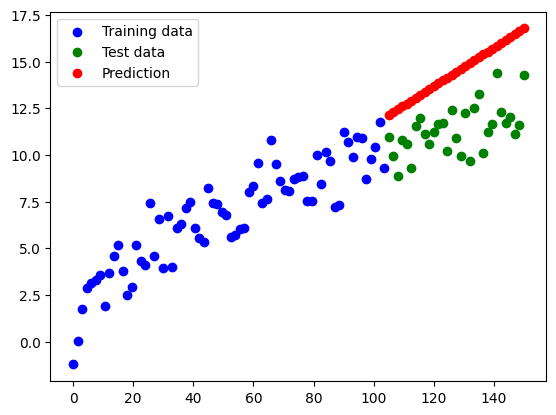

In [132]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_1.predict(X_test)
                )

In [144]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.keras.losses.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

Increasing neurons doesn't perform well as we expect. Nearly, we get same results. So let's continue to second option, which is changing optimization function.

### Model_2: Changing optimization function. Trying Adam optimizer.

In [133]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 9.2130 - mae: 9.2130
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 3.8218 - mae: 3.8218
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 3.1053 - mae: 3.1053
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 2.6692 - mae: 2.6692
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1.6357 - mae: 1.6357
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 1.6464 - mae: 1.6464
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 2.2058 - mae: 2.2058
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 2.9326 - mae: 2.9326
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1.9007 - mae: 1.9007
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 1.8702 - mae: 1.8702
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 1.4600

In [153]:
# Calculate evaluation metrics for model_2
print('Mean Absolute Error (MAE):', mae(y_test, model_2.predict(X_test, verbose=0)))
print('Mean Square Error (MSE):', mse(y_test, model_2.predict(X_test, verbose=0)))

Mean Absolute Error (MAE): 1.1105802
Mean Square Error (MSE): 1.8021976


1/1 [==============================] - 0s 75ms/step


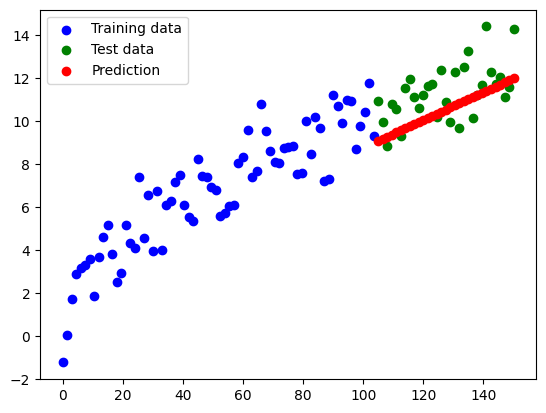

In [134]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_2.predict(X_test)
                )

Woow. We are closer to actual values than before but still it is not enough. We need to improve more so let's go to third option, which is changing learning rate.

### Model_3: Changing learning rate

If you check the below link, you can see more details about Adam optimizer. The first parameter of Adam optimizer is learning rate and this parameter plays a big role in optimization. Adam optimizer's default learning rate value is 0.002. I will increase it to 0.01 and let's check together what will happen.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [135]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['mae']
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 12ms/step - loss: 134.1889 - mae: 134.1889
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 52.5241 - mae: 52.5241
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 12.5053 - mae: 12.5053
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 5.6382 - mae: 5.6382
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 8.5403 - mae: 8.5403
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 3.5814 - mae: 3.5814
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 3.2905 - mae: 3.2905
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 4.9759 - mae: 4.9759
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1.9101 - mae: 1.9101
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 2.4515 - mae: 2.4515
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss

1/1 [==============================] - 0s 78ms/step


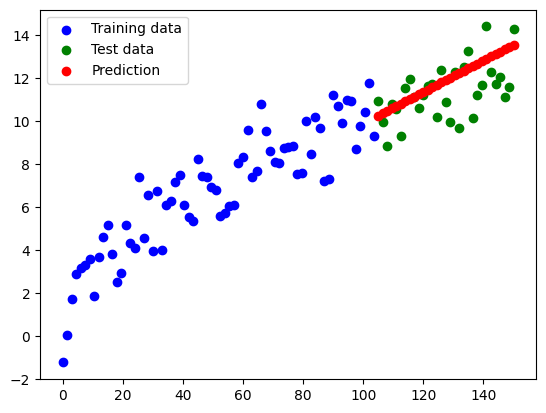

In [136]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_3.predict(X_test)
                )

It looks really good but we have one more option is that fit longer mean that increasing epochs.

### Model_4: Increasing number of epochs. (Fit longer)

I will increse the epochs from the 100 to 300.

In [139]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['mae']
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 1s 9ms/step - loss: 130.3877 - mae: 130.3877
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 203.5959 - mae: 203.5959
Epoch 3/300
3/3 [==============================] - 0s 9ms/step - loss: 31.6741 - mae: 31.6741
Epoch 4/300
3/3 [==============================] - 0s 7ms/step - loss: 12.3584 - mae: 12.3584
Epoch 5/300
3/3 [==============================] - 0s 6ms/step - loss: 8.8748 - mae: 8.8748
Epoch 6/300
3/3 [==============================] - 0s 6ms/step - loss: 15.5893 - mae: 15.5893
Epoch 7/300
3/3 [==============================] - 0s 7ms/step - loss: 4.6112 - mae: 4.6112
Epoch 8/300
3/3 [==============================] - 0s 7ms/step - loss: 11.0752 - mae: 11.0752
Epoch 9/300
3/3 [==============================] - 0s 7ms/step - loss: 7.3995 - mae: 7.3995
Epoch 10/300
3/3 [==============================] - 0s 6ms/step - loss: 2.5035 - mae: 2.5035
Epoch 11/300
3/3 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 75ms/step


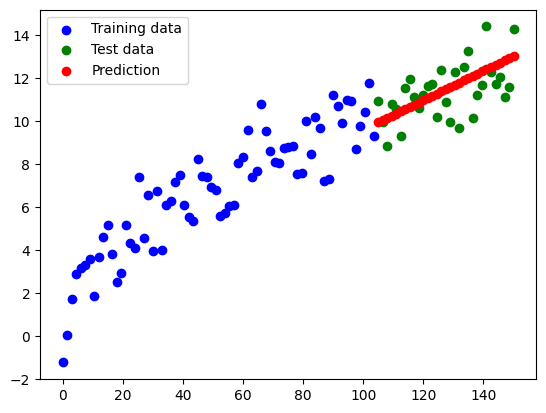

In [138]:
# Call plot_prediction function and see the predictions
plot_prediction(train_data=X_train,
                test_data=X_test,
                train_labels=y_train,
                test_labels=y_test,
                predictions=model_4.predict(X_test)
                )

Increasing epochs from 100 to 300 doesn't perform well. We get same results like last model. Let's compare all model results. 

In [ ]:
# Calculate evaluation metrics for models
print('Mean Absolute Error (MAE):', mae(y_test, y_pred_3))
print('Mean Square Error (MSE):', mse(y_test, y_pred_3))

In [142]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 3.0766 - mae: 3.0766


[3.076634407043457, 3.076634407043457]